In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('./Datasets/diabetes3.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
labels = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
outcome = data['Outcome']

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(labels, outcome, test_size=0.25, random_state=35)
reg = LogisticRegression(solver='liblinear') ##Used liblinear as its efficient for small datasets
reg.fit(xtrain, ytrain)
print("slopes: ", reg.coef_, "intercept", reg.intercept_)
preds = reg.predict(xtest)

slopes:  [[ 0.14775368  0.02931369 -0.02035184  0.00325252 -0.00085683  0.0530559
   0.42477573  0.00684656]] intercept [-5.57848468]


[[110  16]
 [ 36  30]]


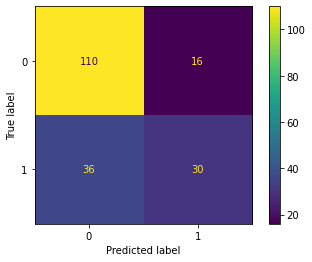

In [28]:
cm = confusion_matrix(ytest, preds)
print(cm)
cfd=ConfusionMatrixDisplay(cm, display_labels=reg.classes_)
cfd.plot()
plt.show()

acc=0.7291666666666666,rec=0.45454545454545453, pre=0.6521739130434783, f1=0.5357142857142857, auc=0.6637806637806638


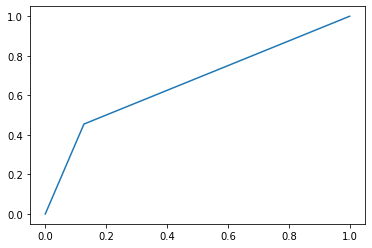

In [30]:
acc = accuracy_score(ytest,preds)
rec = recall_score(ytest, preds)
pre = precision_score(ytest, preds)
f1 = f1_score(ytest, preds)
auc = roc_auc_score(ytest, preds)
print(f"{acc=},{rec=}, {pre=}, {f1=}, {auc=}")
fprs,tprs,thresh = roc_curve(ytest, preds)
plt.plot(fprs, tprs)
plt.show()